<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/Class_7_AIDL_1st_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


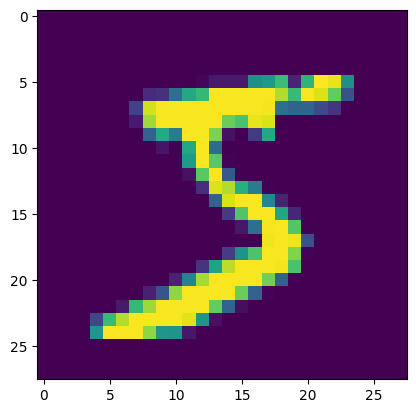

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
model = Sequential()


model.add(Convolution2D(32, kernel_size = 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(Convolution2D(128, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(20, kernel_size = 1, activation='relu'))
model.add(Convolution2D(32, kernel_size = 3, activation='relu'))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(Convolution2D(128, kernel_size = 3, activation='relu'))
model.add(Convolution2D(10, kernel_size = 5))
model.add(Flatten())
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 20)        2580      
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 32)          5792      
                                                        

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 26s 6ms/step - loss: 0.1227 - accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0437 - accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0316 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0118 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0102 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.029736125841736794, 0.9926000237464905]
